# Test structure library

This is a port of `testStructureLibrary.cpp` to Jupyter

## Load necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

testOutputs_path = pathlib.Path("testOutputs")
testOutputs_path.mkdir(parents=True,exist_ok=True)
print(f"testOutputs_path='{testOutputs_path}'")


testOutputs_path='testOutputs'


In [2]:
import CLICopti
#import CLICopti.RFStructure
print(CLICopti.__file__)
print()

#import CLICopti.CLICopti as CLICopti
print("Module content:")
print(dir(CLICopti))
print("Submodule CLICopti.RFstructure:")
print(dir(CLICopti.RFStructure))

/home/kyrsjo/code/clicopti/Python/CLICopti/__init__.pyCLICopti version 2.0
Copyright (C) 2014- 
 Kyrre Ness Sjobak <k.n.sjobak@fys.uio.no> (CERN and University of Oslo),
 Daniel Schulte (CERN),
 Alexej Grudiev (CERN),
 Andrea Latina (CERN),
 Jim Ögren (Uppsala University and CERN)

We have invested a lot of time and effort in creating and maintaining the CLICopti library,
 please cite it when using it. See the CITATION file in the source distribution
 (e.g. on https://gitlab.cern.ch/clic-software/clicopti ) for more information.



Module content:
['CLICopti', 'CellBase', 'CellParams', 'Constants', 'RFStructure', '_CLICopti', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
Submodule CLICopti.RFstructure:
['AccelStructure', 'AccelStructure_CLIC502', 'AccelStructure_CLICG', 'AccelStructure_general', 'AccelStructure_paramSet1', 'AccelStructure_paramSet2', 'AccelStructure_paramSet2_noPsi', '_AccelStructure_getDeltaT_all_

## Generate structure from `CellBase_linearInterpolation`, using the 30GHz cells

In [3]:
#Database filename to load
print(CLICopti.CellBase.celldatabase_TD_30GHz)

#Load the database, with variables psi/an/dn
base = CLICopti.CellBase.CellBase_linearInterpolation(CLICopti.CellBase.celldatabase_TD_30GHz, ["psi","a_n","d_n"])

/home/kyrsjo/code/clicopti/Python/CLICopti/TD_30GHz.dat


In [4]:
#Create a structure
acs = CLICopti.RFStructure.AccelStructure_paramSet1(base,25,120, 0.12, 0.015, 0.2)

print ("first:", acs.getCellFirst())
print ("mid  :", acs.getCellMid())
print ("last :", acs.getCellLast())
print()

print("Length = ", acs.getL(), "[m]")

first: h=0.00333269[m], a=0.00127476[m], d_n=0.2, a_n=0.1275, f0=29.985[GHz], psi=120[deg], Q=3895.04, vg=1.9825[%c], rQ=36267.5[linacOhm/m], Es=2.0875, Hs=4.26458[mA/V], Sc=nan[mA/V], f1mn=41.4658[GHz], Q1mn=12.3271, A1mn=2251.89[V/pC/m/mm]
mid  : h=0.00333269[m], a=0.00119977[m], d_n=0.2, a_n=0.12, f0=29.985[GHz], psi=120[deg], Q=3884.17, vg=1.6[%c], rQ=37690[linacOhm/m], Es=2.05, Hs=4.20833[mA/V], Sc=nan[mA/V], f1mn=41.9933[GHz], Q1mn=11.0583, A1mn=2416.11[V/pC/m/mm]
last : h=0.00333269[m], a=0.00112478[m], d_n=0.2, a_n=0.1125, f0=29.985[GHz], psi=120[deg], Q=3873.29, vg=1.2175[%c], rQ=39112.5[linacOhm/m], Es=2.0125, Hs=4.15208[mA/V], Sc=nan[mA/V], f1mn=42.5208[GHz], Q1mn=9.78958, A1mn=2580.32[V/pC/m/mm]

Length =  0.08331734144850202 [m]


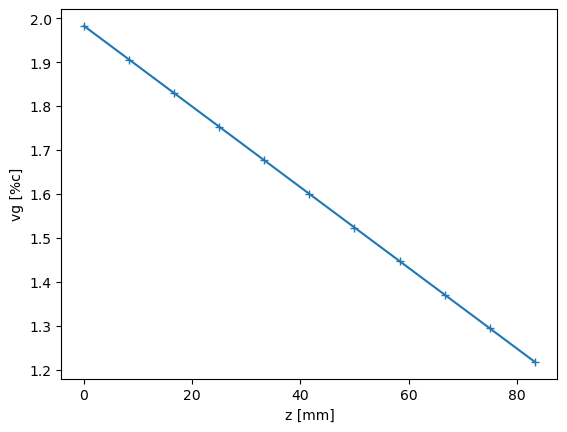

In [5]:
#Testing the interpolator
nPoints = 11

z = np.linspace(0,acs.getL(), nPoints)
vg = acs.getInterpolated(z,"vg")

plt.figure()
plt.plot(np.asarray(z)*1e3,vg, '+-')
plt.xlabel('z [mm]')
plt.ylabel(r'vg [%c]')
plt.show()

In [6]:
#Testing the integration
acs.calc_g_integrals(100)
print("V_UL(1 [MW])", acs.getVoltageUnloaded(1e6)/1e6, "[MV]")
print("t_fill =", acs.getTfill()*1e9, " [ns]")
print("t_rise =", acs.getTrise()*1e9, " [ns]")

acs.writeProfileFile(str(testOutputs_path / "testfile_acs.dat"), 10e6)

V_UL(1 [MW]) 2.646674304556897 [MV]
t_fill = 17.71252877003441  [ns]
t_rise = 14.316221765913763  [ns]


## Creating an AccelStructure502

In [7]:
#Creating an AccelStructure502
acs502 = CLICopti.RFStructure.AccelStructure_CLIC502(22)

print ("first :", acs502.getCellFirst())
print ("mid   :",   acs502.getCellMid())
print ("last  :",  acs502.getCellLast())
print()

print("Length = ", acs502.getL(), "[m]")
print()

acs502.calc_g_integrals(1000)

#Check against old CLIC_502 results
# should return 22.9424193839 MV -> 100.131529432 MV/m
Pref502 = 74.1942303887e6 #[W]
print(f"V_UL({Pref502/1e6} [MW])  =", acs.getVoltageUnloaded(Pref502)/1e6, "[MV]")
print("    average unloaded gradient =", acs.getVoltageUnloaded(Pref502)/1e6/acs502.getL(), "[MV/m]")
print()

print("Consistency1: 1W->1W?: ", acs502.getPowerUnloaded(acs502.getVoltageUnloaded(1.0)))
print("Consistency2: 1V->1V?: ", acs502.getVoltageUnloaded(acs502.getPowerUnloaded(1.0)))


first : h=0.0104145[m], a=0.00396991[m], d_n=0.199718, a_n=0.158833, f0=11.9942[GHz], psi=150[deg], Q=6364.72, vg=2.056[%c], rQ=10305.2[linacOhm/m], Es=2.25, Hs=4.684[mA/V], Sc=0.493[mA/V], f1mn=15.8236[GHz], Q1mn=16.7825, A1mn=77.2389[V/pC/m/mm]
mid   : h=0.0104145[m], a=0.00362493[m], d_n=0.180035, a_n=0.14503, f0=11.9942[GHz], psi=150[deg], Q=6370.44, vg=1.614[%c], rQ=11213.6[linacOhm/m], Es=2.23, Hs=4.511[mA/V], Sc=0.435[mA/V], f1mn=16.0819[GHz], Q1mn=12.9751, A1mn=94.8334[V/pC/m/mm]
last  : h=0.0104145[m], a=0.00327994[m], d_n=0.160351, a_n=0.131227, f0=11.9942[GHz], psi=150[deg], Q=6382.94, vg=1.234[%c], rQ=12176.1[linacOhm/m], Es=2.22, Hs=4.342[mA/V], Sc=0.381[mA/V], f1mn=16.3403[GHz], Q1mn=9.1678, A1mn=112.429[V/pC/m/mm]

Length =  0.22911812349128466 [m]

V_UL(74.19423038869999 [MW])  = 22.797413059768033 [MV]
    average unloaded gradient = 99.5006973363031 [MV/m]

Consistency1: 1W->1W?:  1.0
Consistency2: 1V->1V?:  1.0


In [8]:
dt_bunch = 0.5e-9 #[ns]
I_beam=CLICopti.Constants.electron_charge*6.8e9/dt_bunch #[A]
t_beam = 354*dt_bunch #[ns]
print("I_beam =", I_beam, "[A]")
print("dt_bunch =", dt_bunch, "[ns]")
print("t_beam =", t_beam*1e9, "[ns]")
print()

print("Beam loading voltage =", acs502.getLoadingVoltage(I_beam)/1e6, "[MV]")
print(f"V_L({Pref502/1e6} [MW])  =", acs502.getVoltageLoaded(Pref502, I_beam)/1e6, "[MV]")
print( "     average loaded gradient =", acs502.getVoltageLoaded(Pref502, I_beam)/1e6/acs502.getL(), "[MV]")
print()

#Should get 74.1942303887 MW
print("Power to achieve 80 [MV/m] loaded gradient =", acs502.getPowerLoaded(80e6*acs502.getL(), I_beam)/1e6, " [MW]")

#Efficiency (should get 39.6% total at t_rise=15.3ns)
print("RF to beam efficiency (flat-top) =", acs502.getFlattopEfficiency(Pref502, I_beam)*100, r"[%]")
print("RF to beam efficiency (total   ) =", acs502.getTotalEfficiency(Pref502, I_beam, t_beam)*100, r"[%]")

I_beam = 2.1789599855999997 [A]
dt_bunch = 5e-10 [ns]
t_beam = 177.0 [ns]

Beam loading voltage = 4.615403474889477 [MV]
V_L(74.19423038869999 [MW])  = 18.332650861423442 [MV]
     average loaded gradient = 80.01397088135977 [MV]

Power to achieve 80 [MV/m] loaded gradient = 74.17353339734548  [MW]
RF to beam efficiency (flat-top) = 53.83991780458034 [%]
RF to beam efficiency (total   ) = 39.259387576113525 [%]


In [9]:
#Consistency check; must use a higher value than the beam loading voltage,
# or else the power gets negative!
print("Consistency1: 10MW->10MW? :", acs502.getPowerLoaded(acs502.getVoltageLoaded(10.0e6,I_beam),I_beam)/1e6, "[MW]")
print("Consistency2: 10MV->10MV? :", acs502.getVoltageLoaded(acs502.getPowerLoaded(10.0e6,I_beam),I_beam)/1e6, "[MV]")


Consistency1: 10MW->10MW? : 10.000000000000004 [MW]
Consistency2: 10MV->10MV? : 10.0 [MV]


In [10]:
print("t_fill =", acs502.getTfill()*1e9, " [ns]")
print("t_rise =", acs502.getTrise()*1e9, " [ns]")


t_fill = 48.07997136975671  [ns]
t_rise = 17.655996758508913  [ns]


In [11]:
acs502.writeProfileFile(str(testOutputs_path / "testfile_acs502.dat"), Pref502);

print("Unloaded max fields:\n", acs502.getMaxFields(Pref502))

acs502.writeDeltaTprofileFile(str(testOutputs_path / "testfile_acs502_deltaT_unloaded.dat"), Pref502, t_beam, I_beam, False);
maxDeltaT = acs502.getMaxDeltaT(Pref502, t_beam, I_beam, False) #TODO remove variable
print("",maxDeltaT)
#print(" max deltaT =", maxDeltaT.maxDeltaT, '[K]')

Unloaded max fields:
 maxEs=226.667[MV/m]@idx=952, maxHs=454.334[kA/m]@idx=295, maxSc=4.60871[W/um^2]@idx=0, maxPC=2.97447[MW/mm]@idx=0
 maxDeltaT=41.6178[K]@idx=295


In [12]:
acs502.writeProfileFile(str(testOutputs_path / "testfile_acs502_loaded.dat"), Pref502,I_beam);
print("Loaded max fields:\n", acs502.getMaxFields(Pref502, I_beam))

acs502.writeDeltaTprofileFile(str(testOutputs_path / "testfile_acs502_deltaT_loaded.dat"), Pref502, t_beam, I_beam, True);
maxDeltaT = acs502.getMaxDeltaT(Pref502, t_beam, I_beam, True)
print("",maxDeltaT)
#print(" max deltaT =", maxDeltaT.maxDeltaT, '[K]')

Loaded max fields:
 maxEs=217.545[MV/m]@idx=0, maxHs=452.88[kA/m]@idx=0, maxSc=4.60871[W/um^2]@idx=0, maxPC=2.97447[MW/mm]@idx=0
 maxDeltaT=41.3519[K]@idx=0


In [13]:
acs502.writeTimePowerProfileFile(str(testOutputs_path / "testfile_acs502_tProfile.dat"),Pref502, t_beam, I_beam, 5000);
print("Extra time with power > 0.8*P0 = ", 0.8*Pref502/1e6, "[MW]:\n ",
       acs502.getExtraTimePowerAboveFraction(Pref502, I_beam, 0.8)*1e9,
        "[ns], total time = ", acs502.getExtraTimePowerAboveFraction(Pref502, I_beam, 0.8)*1e9 + t_beam*1e9, "[ns]")
  

Extra time with power > 0.8*P0 =  59.35538431096 [MW]:
  25.345636160327892 [ns], total time =  202.3456361603279 [ns]


## Extract various useful information from the system

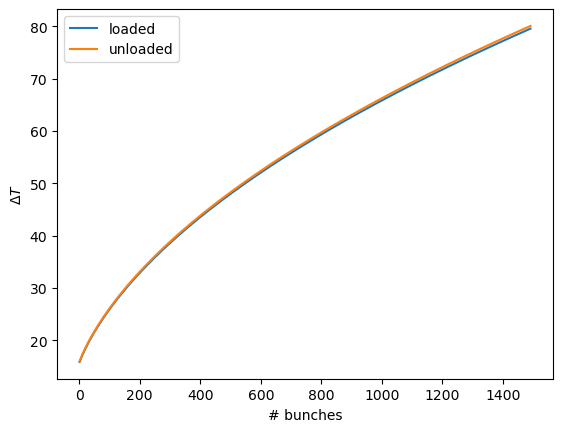

In [14]:
#Example of a simple scan:
#plot deltaT(t_Beam) for a given beam current and power
    
scan_bunches     = []
scan_t_beam      = []
scan_dT_loaded   = []
scan_dT_unloaded = []

acs502.calc_g_integrals(1000)
for b in range (1,1500,10):
    scan_bunches.append(b)
    t = b*dt_bunch
    scan_t_beam.append(t)

    scan_dT_loaded.append(   acs502.getMaxDeltaT(Pref502,t,I_beam,True ).maxDeltaT )
    scan_dT_unloaded.append( acs502.getMaxDeltaT(Pref502,t,I_beam,False).maxDeltaT )

    #print(bunches, scan_t_beam[-1], scan_dT_loaded[-1], scan_dT_unloaded[-1])

plt.figure()
plt.plot(scan_bunches,scan_dT_loaded, label="loaded")
plt.plot(scan_bunches,scan_dT_unloaded, label="unloaded")
plt.xlabel("# bunches")
plt.ylabel(r'$\Delta T$')
plt.legend()
plt.show()

In [15]:
# Get max allowed power given fixed BD constraints
max_Es = 300 #MV/m, at P0 max is 217.54
max_Sc = 5.0 #W/um^2, at P0 max is 4.6
print(f"Finding max power at max_Es = {max_Es} [MV/m], max_Sc = {max_Sc} [W/um^2], I_beam = {I_beam} [A]")

acs502.calc_g_integrals(1000)
max_P0 = acs502.getMaxAllowablePower(I_beam, max_Es, max_Sc)
print(" Got max_P0 =", max_P0/1e6, " [MW]")
maxFields_L = acs502.getMaxFields(max_P0, I_beam)
print(" maxFields_L :", maxFields_L)
maxFields_UL = acs502.getMaxFields(max_P0, 0.0)
print(" maxFields_UL:", maxFields_UL)

##TODO: Why not actually maxed?

Finding max power at max_Es = 300 [MV/m], max_Sc = 5.0 [W/um^2], I_beam = 2.1789599855999997 [A]
 Got max_P0 = 71.27896001691923  [MW]
 maxFields_L : maxEs=213.228[MV/m]@idx=0, maxHs=443.893[kA/m]@idx=0, maxSc=4.42762[W/um^2]@idx=0, maxPC=2.8576[MW/mm]@idx=0
 maxFields_UL: maxEs=222.169[MV/m]@idx=952, maxHs=445.318[kA/m]@idx=295, maxSc=4.42762[W/um^2]@idx=0, maxPC=2.8576[MW/mm]@idx=0


In [16]:
#Test that return 0.0 works (testing deltaT)
max_Es_strict = max_Es/10 #MV/m, at P0 max is 217.54
max_Sc_strict = max_Es/10 #W/um^2, at P0 max is 4.6
print(f"Finding max power at max_Es = {max_Es_strict} [MV/m], max_Sc = {max_Sc_strict} [W/um^2], I_beam = {I_beam} [A]")

max_P0_strict = acs502.getMaxAllowablePower(I_beam, max_Es_strict, max_Sc_strict)
print(" Got max_P0_strict =", max_P0_strict/1e6, " [MW]")
maxFields_L_strict = acs502.getMaxFields(max_P0_strict, I_beam)
print(" maxFields_L_strict :", maxFields_L_strict) #Loading only!
maxFields_UL_strict = acs502.getMaxFields(max_P0_strict, 0.0)
print(" maxFields_UL:", maxFields_UL_strict) #Off


Finding max power at max_Es = 30.0 [MV/m], max_Sc = 30.0 [W/um^2], I_beam = 2.1789599855999997 [A]
 Got max_P0_strict = 0.0  [MW]
 maxFields_L_strict : maxEs=100.675[MV/m]@idx=999, maxHs=196.906[kA/m]@idx=999, maxSc=0.783542[W/um^2]@idx=999, maxPC=0.402316[MW/mm]@idx=999
 maxFields_UL: maxEs=0[MV/m]@idx=0, maxHs=0[kA/m]@idx=0, maxSc=0[W/um^2]@idx=0, maxPC=0[MW/mm]@idx=0


In [17]:
#Get maximum allowable beam time from temperature rise
max_deltaT = 50
useLoadedField = True
print("Finding maximum beam time allowable, max deltaT =", max_deltaT, "[K], power =", max_P0/1e6, "[MW]")
print(" I_beam =", I_beam, "[A], useLoadedField=",useLoadedField)
print(" This corresponds to loaded gradient", acs502.getVoltageLoaded(max_P0,I_beam)/acs502.getL()/1e6, "[MV/m]")
t_beam_max = acs502.getMaxAllowableBeamTime_dT(max_P0, I_beam,useLoadedField)
print("Got t_beam_max =", t_beam_max*1e9, "[ns]")

Finding maximum beam time allowable, max deltaT = 50 [K], power = 71.27896001691923 [MW]
 I_beam = 2.1789599855999997 [A], useLoadedField= True
 This corresponds to loaded gradient 78.02652403367271 [MV/m]
Got t_beam_max = 300.22844374781147 [ns]


0: P0=3.001219369133442 [MW], G=0.0
 steady state solution for t_beam
 Max beamtime from DeltaT at this power = 41686.8152940588 [ns] = 500000.0 [cycles],
  for max_deltaT = 50 [K]

1: P0=10.587634996665194 [MW], G=17.691409134500326
 Max beamtime from DeltaT at this power = 274.2158710043187 [ns] = 3288.999999999999 [cycles],
  for max_deltaT = 50 [K]

2: P0=18.17405062419695 [MW], G=29.42673862763446
 steady state solution for t_beam
 Max beamtime from DeltaT at this power = 41686.8152940588 [ns] = 500000.0 [cycles],
  for max_deltaT = 50 [K]

3: P0=25.760466251728705 [MW], G=38.872938507936446
 Max beamtime from DeltaT at this power = 274.2158710043187 [ns] = 3288.999999999999 [cycles],
  for max_deltaT = 50 [K]

4: P0=33.34688187926046 [MW], G=47.00315544942807
 steady state solution for t_beam
 Max beamtime from DeltaT at this power = 41686.8152940588 [ns] = 500000.0 [cycles],
  for max_deltaT = 50 [K]

5: P0=40.93329750679221 [MW], G=54.250101305829766
 Max beamtime from DeltaT a

Text(0, 0.5, '$t_{beam}$ [ns]')

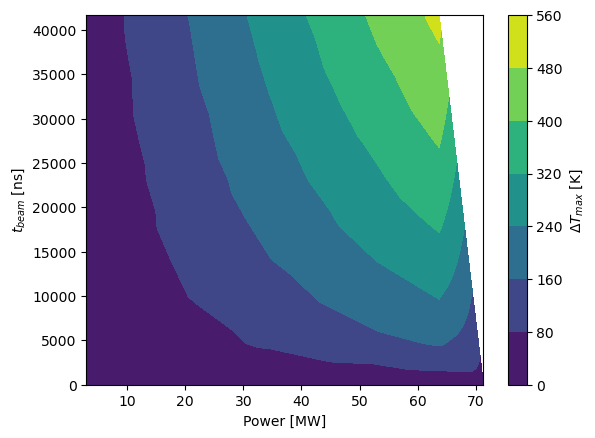

In [18]:
#Make a map over gradient and max fields/temperature as a function of power and time
max_deltaT = 50 #[K]

min_P0 = acs502.getPowerLoaded(0.0,I_beam)

P0_steps = 10
tBeam_steps = 10

scan2_power     = [] #[MW]
scan2_gradient  = [] #[MV/m]
scan2_tBeam     = [] #[ns]
scan2_maxDeltaT = [] #[K]

for iP0 in range(P0_steps):
    power = (max_P0-min_P0)/(P0_steps-1) * iP0 + min_P0
    V  = acs502.getVoltageLoaded(power,I_beam)
    print(f"{iP0}: P0={power/1e6} [MW], G={V/acs502.getL()/1e6}")

    #Catch steady state solutions - defined as "longer than 50k cycles"
    t_beam_steady = 500000 * 2*np.pi / acs502.getOmega()
    if (acs502.getMaxDeltaT(power, t_beam_max, I_beam, useLoadedField).maxDeltaT <= max_deltaT):
        t_beam_max = t_beam_steady
        print(" steady state solution for t_beam")
    else:
        t_beam_max = acs502.getMaxAllowableBeamTime_dT(Pref502, I_beam, useLoadedField)
    
    print(f" Max beamtime from DeltaT at this power = {t_beam_max*1e9} [ns] = {t_beam_max*acs502.getOmega()/(2*np.pi)} [cycles],")
    print(f"  for max_deltaT = {max_deltaT} [K]")
    acs502.writeDeltaTprofileFile(str(testOutputs_path / f"testfile_acs_deltaT_Pin{power/1e6}_tBeam{t_beam_max}.dat"),
                                  power, I_beam, useLoadedField)
    
    for iTbeam in range(tBeam_steps):
        tBeam = t_beam_max/(tBeam_steps-1) * iTbeam
        maxDeltaT = acs502.getMaxDeltaT(power, tBeam, I_beam, useLoadedField).maxDeltaT

        scan2_power.append(power/1e6)
        scan2_gradient.append(V/acs502.getL()/1e6)
        scan2_tBeam.append(tBeam*1e9)
        scan2_maxDeltaT.append(maxDeltaT)

    print()

plt.figure()
plt.tricontourf(scan2_power, scan2_tBeam, scan2_maxDeltaT)
plt.colorbar().set_label(r"$\Delta T_{max}$ [K]")
plt.xlabel("Power [MW]")
plt.ylabel("$t_{beam}$ [ns]")



Minimum bunch spacing = 8 [cycles]


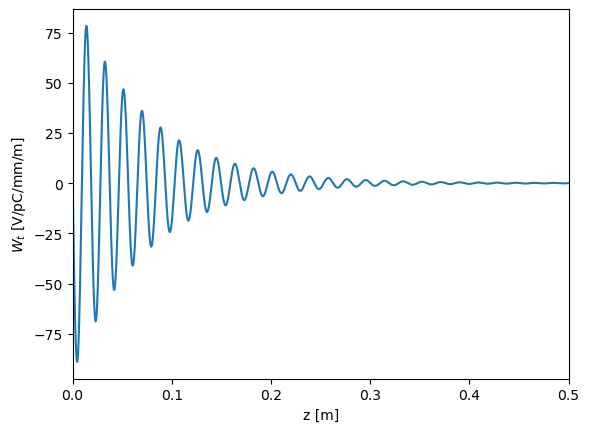

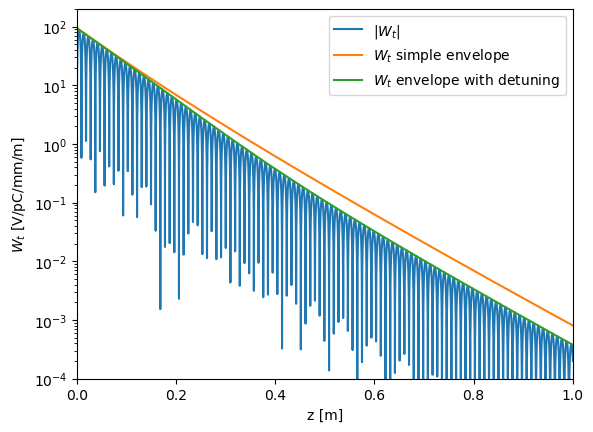

In [19]:
#Wakefield plot - triggers wake precalculation. Also happens automatically from getTransverseWakePotential() etc.
acs502.writeWakeFile(str(testOutputs_path / "testfile_acs502_wakeFile.dat"), 10.0, 0.0001)

wake_z = np.arange(10.0,step=0.0001) #[m]
#  wakeFile << "# z[m] Wt[V/pC/mm/m] fabs(Wt) Envelope(Wt) Envelope_detuning(Wt)" << endl;

wake_Wt            = acs502.getTransverseWakePotential(wake_z)
wake_envWt         = acs502.getTransverseWakePotentialEnvelope(wake_z)
wake_envDetuningWt = acs502.getTransverseWakePotentialEnvelope_detuning(wake_z)


wake_absWt = np.fabs(wake_Wt)
#Minimum bunch spacing; from paper, limit = 6.3 V/pV/mm/m
print(f"Minimum bunch spacing = {acs502.getMinBunchSpacing(6.3)} [cycles]")

plt.figure()
plt.plot(wake_z, wake_Wt)
plt.xlim(0,0.5)
plt.xlabel('z [m]')
plt.ylabel('$W_t$ [V/pC/mm/m]')

plt.figure()
plt.plot(wake_z, wake_absWt, label='$|W_t|$')
plt.plot(wake_z, wake_envWt, label='$W_t$ simple envelope')
plt.plot(wake_z, wake_envDetuningWt, label='$W_t$ envelope with detuning')
plt.yscale('log')
plt.xlim(0,1)
plt.ylim(1e-4,2e2)
plt.legend()
plt.xlabel('z [m]')
plt.ylabel('$W_t$ [V/pC/mm/m]')

plt.show()

In [20]:
#Maximum times
print(f"Maximum beam time [ns] at Pref502 = {Pref502/1e6} [MW] and I_Beam = {I_beam} [A]:")
print(f" Wasted beam pulse      : {acs502.getExtraTimePowerAboveFraction(Pref502, I_beam)*1e9} [ns]")
print(f" Max beam time from Es  : {acs502.getMaxAllowableBeamTime_E(Pref502,I_beam)*1e9} [ns]")
print(f" Max beam time from Sc  : {acs502.getMaxAllowableBeamTime_Sc(Pref502,I_beam)*1e9} [ns]")
print(f" Max beam time from dT  : {acs502.getMaxAllowableBeamTime_dT(Pref502,I_beam)*1e9} [ns]")
print(f" Max beam time from P/C : {acs502.getMaxAllowableBeamTime_PC(Pref502,I_beam)*1e9} [ns]")
print(f" Max beam time, overall : {acs502.getMaxAllowableBeamTime(Pref502,I_beam)*1e9} [ns]")
print(f" Max beam time, detailed:\n  {acs502.getMaxAllowableBeamTime_detailed(Pref502,I_beam)} [ns]")

Maximum beam time [ns] at Pref502 = 74.19423038869999 [MW] and I_Beam = 2.1789599855999997 [A]:
 Wasted beam pulse      : 19.009227120245917 [ns]
 Max beam time from Es  : 194.92182198405087 [ns]
 Max beam time from Sc  : 111.74991445744317 [ns]
 Max beam time from dT  : 270.29731036667727 [ns]
 Max beam time from P/C : 73.4570507744393 [ns]
 Max beam time, overall : 73.4570507744393 [ns]
 Max beam time, detailed:
  power=74.1942[MW], beamCurrent_pulseShape=2.17896[A], beamCurrent_loading=2.17896[A], powerFraction=0.85, wastedTime=19.0092[ns], maxFields={maxEs=217.545[MV/m]@idx=0, maxHs=452.88[kA/m]@idx=0, maxSc=4.60871[W/um^2]@idx=0, maxPC=2.97447[MW/mm]@idx=0}, time_E=194.922[ns], time_Sc=111.75[ns], time_dT=274.216[ns], time_PC=73.4571[ns], time=73.4571[ns], which='P' [ns]


# Testing the CLIC_G structure

In [21]:

I_beam = CLICopti.Constants.electron_charge*3.7e9/dt_bunch; #[A]
print(f" New I_beam = {I_beam} [A]")

#Creating AccelStructure_CLICG; R05 variety, not database
acsG_R05 = CLICopti.RFStructure.AccelStructure_CLICG(24, True)

print ("first :", acsG_R05.getCellFirst())
print ("mid   :", acsG_R05.getCellMid())
print ("last  :", acsG_R05.getCellLast())
print()

print("Length = ", acsG_R05.getL(), "[m]")
print()

acsG_R05.calc_g_integrals(500)

print("t_fill =", acsG_R05.getTfill()*1e9, " [ns]")
print("t_rise =", acsG_R05.getTrise()*1e9, " [ns]")

print(f"V24 = {acsG_R05.getVoltageUnloaded(1.0)} [V] (expected 3080 [V])" )
print(f"Pin at 100MV/m = {acsG_R05.getVoltageUnloaded(100e6*acsG_R05.getL())/1e6} [MW] (expected 42.1 [MW]) (unloaded)")
print(f"Peak fields (unloaded):\n {acsG_R05.getMaxFields(acsG_R05.getPowerUnloaded(100e6*acsG_R05.getL()))}")
print()


 New I_beam = 1.1856105804 [A]
first : h=0.0083316[m], a=0.00315[m], d_n=0.200442, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=5536, vg=1.65[%c], rQ=14587[linacOhm/m], Es=1.95, Hs=4.1[mA/V], Sc=0.41[mA/V], f1mn=16.91[GHz], Q1mn=11.1, A1mn=125[V/pC/m/mm]
mid   : h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=5635, vg=1.2[%c], rQ=16220[linacOhm/m], Es=1.93, Hs=3.85[mA/V], Sc=0.35[mA/V], f1mn=17.35[GHz], Q1mn=8.7, A1mn=156[V/pC/m/mm]
last  : h=0.0083316[m], a=0.00235[m], d_n=0.120025, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=5738, vg=0.83[%c], rQ=17954[linacOhm/m], Es=1.9, Hs=3.6[mA/V], Sc=0.3[mA/V], f1mn=17.8[GHz], Q1mn=7.1, A1mn=182[V/pC/m/mm]

Length =  0.199958285171166 [m]

t_fill = 57.16221317164424  [ns]
t_rise = 21.0  [ns]
V24 = 3121.8920313599074 [V] (expected 3080 [V])
Pin at 100MV/m = 13.96006951851529 [MW] (expected 42.1 [MW]) (unloaded)
Peak fields (unloaded):
 maxEs=195.381[MV/m]@idx=371, maxHs=391.617[kA/m]@idx=41, maxSc

In [22]:
PrefG = acsG_R05.getPowerLoaded(100e6*acsG_R05.getL(), I_beam)
print(f"Pin at 100MV/m = {PrefG/1e6} [MW]  (loaded)")
print(f"Peak fields (loaded):\n {acsG_R05.getMaxFields(PrefG,I_beam)}")

Pin at 100MV/m = 57.358716946958396 [MW]  (loaded)
Peak fields (loaded):
 maxEs=220.161[MV/m]@idx=0, maxHs=462.903[kA/m]@idx=0, maxSc=5.22632[W/um^2]@idx=0, maxPC=2.89807[MW/mm]@idx=0


In [23]:
print("Writing power profile files")
acsG_R05.writeTimePowerProfileFile(str(testOutputs_path / "testfile_acsG_R05_timePowerProfile.dat"), PrefG, 312*dt_bunch, I_beam, 500)
acsG_R05.writeTimeDeltaTprofileFile(str(testOutputs_path / "testfile_acsG_R05_timeDeltaTprofile.dat"), Pref502, 4*312*dt_bunch, I_beam, False, 2*4*312)

print("Writing parameter profile file")
acsG_R05.writeParameterProfileFile(str(testOutputs_path / "testfile_acsG_R05_parameterProfile.dat"))

print("Writing wake file")
acsG_R05.writeWakeFile(str(testOutputs_path / "testfile_acsG_R05_wakeFile.dat"), 10, 0.0001)

Writing power profile files
Writing parameter profile file
Writing wake file


Writing profile files, gradient scan
Now at loaded G=0.0 [MV/m]
 power = 1365435.5614351847 [MW]
 Gul = 18.243748654072125 [MV/m]
 Max allowable beam time (loaded / loaded pulse shape, no beam, unloaded):
  power=1.36544[MW], beamCurrent_pulseShape=1.18561[A], beamCurrent_loading=1.18561[A], powerFraction=0.85, wastedTime=69.3207[ns], maxFields={maxEs=45.5856[MV/m]@idx=499, maxHs=86.3727[kA/m]@idx=499, maxSc=0.172691[W/um^2]@idx=499, maxPC=0.0716946[MW/mm]@idx=499}, time_E=2.52691e+06[ns], time_Sc=2.48537e+06[ns], time_dT=232792[ns], time_PC=6.60313e+06[ns], time=232792[ns], which='T'
  power=1.36544[MW], beamCurrent_pulseShape=1.18561[A], beamCurrent_loading=0[A], powerFraction=0.85, wastedTime=69.3207[ns], maxFields={maxEs=35.6448[MV/m]@idx=371, maxHs=71.4455[kA/m]@idx=41, maxSc=0.124414[W/um^2]@idx=0, maxPC=0.0689891[MW/mm]@idx=0}, time_E=1.10557e+07[ns], time_Sc=6.64665e+06[ns], time_dT=497353[ns], time_PC=7.41083e+06[ns], time=497353[ns], which='T'
  power=1.36544[MW], beamCurrent

Text(0, 0.5, 'G(z) [MV/m]')

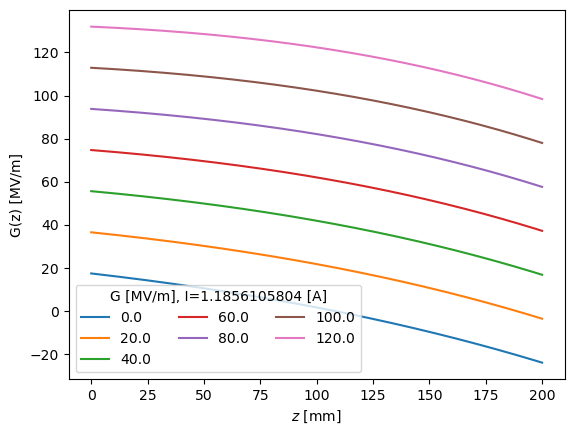

In [24]:
scanG_G = []
scanG_z = np.zeros(acsG_R05.getZNumpoints())
for i in range(acsG_R05.getZNumpoints()):
    scanG_z[i] = acsG_R05.getZ(i)
scanG_Ez = {}

print("Writing profile files, gradient scan")
plt.figure()
for G in np.arange(0, 120.1, 20):
    print(f"Now at loaded G={G} [MV/m]")
    power = acsG_R05.getPowerLoaded(G*1e6*acsG_R05.getL(), I_beam)
    print(f" power = {power} [MW]")
    Gul = acsG_R05.getVoltageUnloaded(power)/acsG_R05.getL() / 1e6; #[MV/m]
    print(f" Gul = {Gul} [MV/m]")

    outfilename = testOutputs_path / f"testfile_acsG_R05_unloaded_G={Gul}MWm.dat"
    acsG_R05.writeProfileFile(str(outfilename), power, 0.0)

    outfilename = testOutputs_path / f"testfile_acsG_R05_loaded_G={G}MWm.dat"
    acsG_R05.writeProfileFile(str(outfilename), power, I_beam)

    print(f" Max allowable beam time (loaded / loaded pulse shape, no beam, unloaded):\n  {acsG_R05.getMaxAllowableBeamTime_detailed(power,I_beam)}")
    print(f"  {acsG_R05.getMaxAllowableBeamTime_detailed(power,I_beam, 0.0)}")
    print(f"  {acsG_R05.getMaxAllowableBeamTime_detailed(power,0.0)}")

    scanG_G.append(G)
    scanG_Ez[G] = np.zeros_like(scanG_z)
    for i in range(len(scanG_z)):
        scanG_Ez[G][i] = acsG_R05.getEz_loaded(i, power, I_beam)
        
    plt.plot(scanG_z*1e3, scanG_Ez[G]/1e6, label=f"{G}")

plt.legend(title=f'G [MV/m], I={I_beam} [A]', ncol=3)
plt.xlabel('$z$ [mm]')
plt.ylabel('G(z) [MV/m]')

    

Writing profile files, current scan (G_L=100 MV/m)
Now at I=0.0 [I]
 power = 41024476.59297952 [MW]
 Gul = 99.99999999999999 [MV/m]
 Max allowable beam time (loaded / loaded pulse shape, no beam, unloaded):
  power=41.0245[MW], beamCurrent_pulseShape=1.18561[A], beamCurrent_loading=1.18561[A], powerFraction=0.85, wastedTime=22.263[ns], maxFields={maxEs=186.193[MV/m]@idx=0, maxHs=391.482[kA/m]@idx=0, maxSc=3.738[W/um^2]@idx=0, maxPC=2.07278[MW/mm]@idx=0}, time_E=521.979[ns], time_Sc=222.808[ns], time_dT=510.205[ns], time_PC=250.984[ns], time=222.808[ns], which='S'
  power=41.0245[MW], beamCurrent_pulseShape=0[A], beamCurrent_loading=0[A], powerFraction=0.85, wastedTime=63.4622[ns], maxFields={maxEs=195.381[MV/m]@idx=371, maxHs=391.617[kA/m]@idx=41, maxSc=3.738[W/um^2]@idx=0, maxPC=2.07278[MW/mm]@idx=0}, time_E=344.174[ns], time_Sc=181.609[ns], time_dT=483.4[ns], time_PC=209.785[ns], time=181.609[ns], which='S'
  power=41.0245[MW], beamCurrent_pulseShape=0[A], beamCurrent_loading=0[A], p

Text(0, 0.5, 'G(z) [MV/m]')

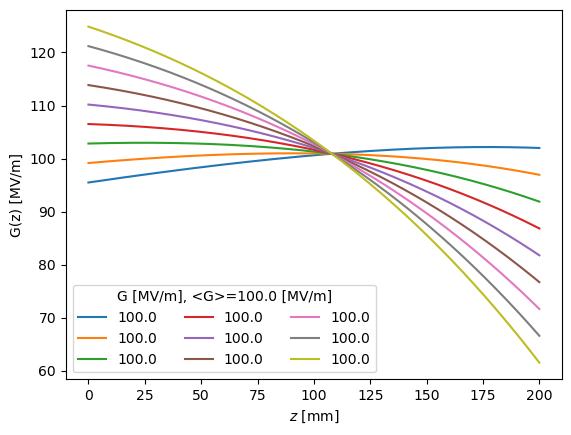

In [25]:
scanI_I = []
scanI_z = np.zeros(acsG_R05.getZNumpoints())
for i in range(acsG_R05.getZNumpoints()):
    scanI_z[i] = acsG_R05.getZ(i)
scanI_Ez = {}

G = 100.0 #[MV/m]
print("Writing profile files, current scan (G_L=100 MV/m)")
plt.figure()
for I in np.arange(0, 2.1, 0.25):
    print(f"Now at I={I} [I]")
    power = acsG_R05.getPowerLoaded(G*1e6*acsG_R05.getL(), I)
    print(f" power = {power} [MW]")
    Gul = acsG_R05.getVoltageUnloaded(power)/acsG_R05.getL() / 1e6; #[MV/m]
    print(f" Gul = {Gul} [MV/m]")

    outfilename = testOutputs_path / f"testfile_acsG_R05_loaded_G={Gul}MWm_I={I}A.dat"
    acsG_R05.writeProfileFile(str(outfilename), power, I)

    print(f" Max allowable beam time (loaded / loaded pulse shape, no beam, unloaded):\n  {acsG_R05.getMaxAllowableBeamTime_detailed(power,I_beam)}")
    print(f"  {acsG_R05.getMaxAllowableBeamTime_detailed(power,I, 0.0)}")
    print(f"  {acsG_R05.getMaxAllowableBeamTime_detailed(power,0.0)}")

    scanI_I.append(I)
    scanI_Ez[I] = np.zeros_like(scanI_z)
    for i in range(len(scanI_z)):
        scanI_Ez[I][i] = acsG_R05.getEz_loaded(i, power, I)
        
    plt.plot(scanI_z*1e3, scanI_Ez[I]/1e6, label=f"{G}")

plt.legend(title=f'G [MV/m], <G>={G} [MV/m]', ncol=3)
plt.xlabel('$z$ [mm]')
plt.ylabel('G(z) [MV/m]')

    

In [26]:
def scalePrintBDR(acs, P0, I0, BDRtarget):
    allowableBeamtimeObject = acs.getMaxAllowableBeamTime_detailed(P0, I0)
    tE  = (allowableBeamtimeObject.time_E  + allowableBeamtimeObject.wastedTime)*1e9
    tSc = (allowableBeamtimeObject.time_Sc + allowableBeamtimeObject.wastedTime)*1e9
    tPC = (allowableBeamtimeObject.time_PC + allowableBeamtimeObject.wastedTime)*1e9
    tau = min([tE,tSc,tPC])
    if ((allowableBeamtimeObject.time_dT + allowableBeamtimeObject.wastedTime)*1e9 < tau):
        print(f"Warning, time_dT = {allowableBeamtimeObject.time_dT*1e9} [ns] shorter than the scaling law limits")

    #Scale pulse lengths to BDR by (BDR/BDR0)^(1/5)
    allowableBeamtimeObject_scaled = acs.getMaxAllowableBeamTime_detailed(P0,I0, BDR=BDRtarget)
    tE_scaled  = (allowableBeamtimeObject_scaled.time_E  + allowableBeamtimeObject_scaled.wastedTime)*1e9
    tSc_scaled = (allowableBeamtimeObject_scaled.time_Sc + allowableBeamtimeObject_scaled.wastedTime)*1e9
    tPC_scaled = (allowableBeamtimeObject_scaled.time_PC + allowableBeamtimeObject_scaled.wastedTime)*1e9
    tau_scaled = min([tE_scaled,tSc_scaled,tPC_scaled])
    if ((allowableBeamtimeObject_scaled.time_dT + allowableBeamtimeObject_scaled.wastedTime)*1e9 < tau):
        print(f"Warning, time_dT = {allowableBeamtimeObject_scaled.time_dT*1e9} [ns] shorter than the scaling law limits")

    
    print(f"tau   = {tau} ns, scaled to {BDRtarget} bpm -> {tau_scaled}")
    print(f"tauE  = {tE} ns, scaled to  {BDRtarget} bpm -> {tE_scaled }")
    print(f"tauSc = {tSc} ns, scaled to {BDRtarget} bpm -> {tSc_scaled}")
    print(f"tauPC = {tPC} ns, scaled to {BDRtarget} bpm -> {tPC_scaled}")
    print(f"taudT = {(allowableBeamtimeObject.time_dT + allowableBeamtimeObject.wastedTime)*1e9} ns")
    print(f"which = {allowableBeamtimeObject.which} -> {allowableBeamtimeObject_scaled.which}")


In [27]:
#Check for pulse length WRT experiment
acsG_R05__P0 = acsG_R05.getPowerUnloaded(102.5*1e6 * acsG_R05.getL())
scalePrintBDR(acsG_R05,acsG_R05__P0,0.0,2e-6)

tau   = 211.32388643462687 ns, scaled to 2e-06 bpm -> 170.6293469900101
tauE  = 351.50308636984977 ns, scaled to  2e-06 bpm -> 272.2283803736694
tauSc = 211.32388643462687 ns, scaled to 2e-06 bpm -> 170.6293469900101
tauPC = 235.6201516888874 ns, scaled to 2e-06 bpm -> 188.23878594961712
taudT = 495.04581191103506 ns
which = S -> S


## AccelStructure_general
Create an AccelStructure_general as a copy of the acsG_R05 (AccelStructure_CLICG, R05 variety, no database)

In [28]:
acsG_R05_copy = CLICopti.RFStructure.AccelStructure_general.copy_structure(acsG_R05, "AccelStructure_general copy of acsG_R05")
acsG_R05_copy.calc_g_integrals(500)

In [29]:

print("L      =", acsG_R05_copy.getL(),"[m]")
print("t_fill =", acsG_R05_copy.getTfill()*1e9,"[ns]")
print("t_rise =", acsG_R05_copy.getTfill()*1e9,"[ns]")

print("FIRST =",acsG_R05_copy.getCellFirst())
print("MID   =",acsG_R05_copy.getCellMid())
print("LAST  =",acsG_R05_copy.getCellLast())


L      = 0.199958285171166 [m]
t_fill = 57.16221317164424 [ns]
t_rise = 57.16221317164424 [ns]
FIRST = h=0.0083316[m], a=0.00315[m], d_n=0.200442, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=5536, vg=1.65[%c], rQ=14587[linacOhm/m], Es=1.95, Hs=4.1[mA/V], Sc=0.41[mA/V], f1mn=16.91[GHz], Q1mn=11.1, A1mn=125[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=5635, vg=1.2[%c], rQ=16220[linacOhm/m], Es=1.93, Hs=3.85[mA/V], Sc=0.35[mA/V], f1mn=17.35[GHz], Q1mn=8.7, A1mn=156[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.120025, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=5738, vg=0.83[%c], rQ=17954[linacOhm/m], Es=1.9, Hs=3.6[mA/V], Sc=0.3[mA/V], f1mn=17.8[GHz], Q1mn=7.1, A1mn=182[V/pC/m/mm]


In [30]:

print("V24 =", acsG_R05_copy.getVoltageUnloaded(1.0), " [V] (expected 3080 V)")
print("Pin at 100 MV/m =", acsG_R05_copy.getPowerUnloaded(100e6*acsG_R05_copy.getL())/1e6,\
      "MW (expected 42.1 MW) (unloaded)")
print("Peak fields (unloaded):", acsG_R05_copy.getMaxFields(100e6*acsG_R05_copy.getL()))

V24 = 3121.8920313599074  [V] (expected 3080 V)
Pin at 100 MV/m = 41.024476592979525 MW (expected 42.1 MW) (unloaded)
Peak fields (unloaded): maxEs=136.405[MV/m]@idx=371, maxHs=273.407[kA/m]@idx=41, maxSc=1.82195[W/um^2]@idx=0, maxPC=1.0103[MW/mm]@idx=0


In [31]:
P0 = acsG_R05_copy.getPowerLoaded(100e6*acsG_R05_copy.getL(), I_beam)
print("Pin at 100 MV/m = ", P0/1e6,"MW")
print("Peak fields (loaded):", acsG_R05_copy.getMaxFields(P0,I_beam))


Pin at 100 MV/m =  57.358716946958396 MW
Peak fields (loaded): maxEs=220.161[MV/m]@idx=0, maxHs=462.903[kA/m]@idx=0, maxSc=5.22632[W/um^2]@idx=0, maxPC=2.89807[MW/mm]@idx=0


In [32]:

print("Writing parameter profile file")
acsG_R05.writeParameterProfileFile(str(testOutputs_path / "testfile_acsG_R05_copy_parameterProfile.dat"))

Writing parameter profile file


## AccelStructure_CLICG
Create an AccelStructure_CLICG (normal variety, no database)

In [33]:
acsG = CLICopti.RFStructure.AccelStructure_CLICG(24,False)
acsG.calc_g_integrals(500)


In [34]:

print("L      =", acsG.getL(),"[m]")
print("t_fill =", acsG.getTfill()*1e9,"[ns]")
print("t_rise =", acsG.getTfill()*1e9,"[ns]")

print("FIRST =",acsG.getCellFirst())
print("MID   =",acsG.getCellMid())
print("LAST  =",acsG.getCellLast())


L      = 0.199958285171166 [m]
t_fill = 58.64009818726125 [ns]
t_rise = 58.64009818726125 [ns]
FIRST = h=0.0083316[m], a=0.00315[m], d_n=0.200442, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=5654, vg=1.617[%c], rQ=14271[linacOhm/m], Es=2.05, Hs=4.75[mA/V], Sc=0.42[mA/V], f1mn=0[GHz], Q1mn=0, A1mn=0[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=5736, vg=1.168[%c], rQ=15840[linacOhm/m], Es=2.05, Hs=4.6[mA/V], Sc=0.36[mA/V], f1mn=0[GHz], Q1mn=0, A1mn=0[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.120025, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=5822, vg=0.811[%c], rQ=17443[linacOhm/m], Es=2.08, Hs=4.45[mA/V], Sc=0.315[mA/V], f1mn=0[GHz], Q1mn=0, A1mn=0[V/pC/m/mm]


In [35]:

print("V24 =", acsG.getVoltageUnloaded(1.0), " [V] (expected 3078 V)")
print("Pin at 100 MV/m =", acsG.getPowerUnloaded(100e6*acsG.getL())/1e6,\
      "MW (expected 42.2 MW) (unloaded)")
print("Peak fields (unloaded):", acsG_R05_copy.getMaxFields(100e6*acsG_R05_copy.getL()))

V24 = 3120.145675960548  [V] (expected 3078 V)
Pin at 100 MV/m = 41.070412503120835 MW (expected 42.2 MW) (unloaded)
Peak fields (unloaded): maxEs=136.405[MV/m]@idx=371, maxHs=273.407[kA/m]@idx=41, maxSc=1.82195[W/um^2]@idx=0, maxPC=1.0103[MW/mm]@idx=0


In [36]:
P0 = acsG.getPowerLoaded(100e6*acsG.getL(), I_beam)
print("Pin at 100 MV/m = ", P0/1e6,"MW")
print("Peak fields (loaded):", acsG.getMaxFields(P0,I_beam))


Pin at 100 MV/m =  57.42161185500174 MW
Peak fields (loaded): maxEs=231.382[MV/m]@idx=0, maxHs=536.128[kA/m]@idx=0, maxSc=5.35056[W/um^2]@idx=0, maxPC=2.90125[MW/mm]@idx=0


In [37]:

print("Writing parameter profile file")
acsG.writeParameterProfileFile(str(testOutputs_path / "testfile_acsG_parameterProfile.dat"))

acsG.writeProfileFile(str(testOutputs_path / "testfile_acsG_unloaded.dat"),P0,0.0)
acsG.writeProfileFile(str(testOutputs_path / "testfile_acsG_loaded.dat"),  P0,I_beam)

print("Max allowable beam time (loaded):\n", acsG.getMaxAllowableBeamTime_detailed(P0,I_beam))

Writing parameter profile file
Max allowable beam time (loaded):
 power=57.4216[MW], beamCurrent_pulseShape=1.18561[A], beamCurrent_loading=1.18561[A], powerFraction=0.85, wastedTime=22.8243[ns], maxFields={maxEs=231.382[MV/m]@idx=0, maxHs=536.128[kA/m]@idx=0, maxSc=5.35056[W/um^2]@idx=0, maxPC=2.90125[MW/mm]@idx=0}, time_E=124.948[ns], time_Sc=60.7382[ns], time_dT=111.721[ns], time_PC=76.8215[ns], time=60.7382[ns], which='S'


## TD24R05, KEK frequency, by scaling CLIC_G base cells and using AccelStructure_general

In [38]:

import CLICopti.CellParams
import CLICopti.RFStructure
#Make database with f0=11.424GHz, just to be used for scaling
cBase11424 = CLICopti.CellBase.CellBase_compat(CLICopti.CellBase.celldatabase_TD_12GHz_v2,11.424, False, 3)

#Scale a CLIC_G to 11.424 GHz
KEK_Gfirst = CLICopti.CellParams.CellParams_copy(acsG_R05.getCellFirst())
cBase11424.scaleCell(KEK_Gfirst)
print("FIRST =", KEK_Gfirst)
KEK_Gmid   =  CLICopti.CellParams.CellParams_copy(acsG_R05.getCellMid())
cBase11424.scaleCell(KEK_Gmid)
print("MID   =", KEK_Gmid)
KEK_Glast =  CLICopti.CellParams.CellParams_copy(acsG_R05.getCellLast())
cBase11424.scaleCell(KEK_Glast)
print("LAST  =", KEK_Glast)

h11424 = (KEK_Gfirst.h + KEK_Gmid.h + KEK_Glast.h) /3
print("h11424 =", h11424, "[m]")

#Create a new structure using these cells
acsG_R05_24_KEK = CLICopti.RFStructure.AccelStructure_general(24, KEK_Gfirst,KEK_Gmid,KEK_Glast)
acsG_R05_24_KEK.calc_g_integrals(500)

FIRST = h=0.00874745[m], a=0.00330722[m], d_n=0.200442, a_n=0.126026, f0=11.424[GHz], psi=120[deg], Q=5672.48, vg=1.65[%c], rQ=13893.5[linacOhm/m], Es=1.95, Hs=4.1[mA/V], Sc=0.41[mA/V], f1mn=16.1061[GHz], Q1mn=11.1, A1mn=108.007[V/pC/m/mm]
MID   = h=0.00874745[m], a=0.00288726[m], d_n=0.160233, a_n=0.110023, f0=11.424[GHz], psi=120[deg], Q=5773.92, vg=1.2[%c], rQ=15448.9[linacOhm/m], Es=1.93, Hs=3.85[mA/V], Sc=0.35[mA/V], f1mn=16.5252[GHz], Q1mn=8.7, A1mn=134.792[V/pC/m/mm]
LAST  = h=0.00874745[m], a=0.00246729[m], d_n=0.120025, a_n=0.0940196, f0=11.424[GHz], psi=120[deg], Q=5879.46, vg=0.83[%c], rQ=17100.5[linacOhm/m], Es=1.9, Hs=3.6[mA/V], Sc=0.3[mA/V], f1mn=16.9538[GHz], Q1mn=7.1, A1mn=157.258[V/pC/m/mm]
h11424 = 0.008747445669934639 [m]


In [39]:
acsG_R05_24_KEK__P0 = acsG_R05_24_KEK.getPowerUnloaded( 100.0*1e6 * acsG_R05_24_KEK.getL() )
scalePrintBDR(acsG_R05_24_KEK,acsG_R05_24_KEK__P0,0.0,1.1e-6)

tau   = 242.04749274193546 ns, scaled to 1.1e-06 bpm -> 179.32868748138046
tauE  = 402.00717821602154 ns, scaled to  1.1e-06 bpm -> 282.1987677115013
tauSc = 251.24418672610005 ns, scaled to 1.1e-06 bpm -> 185.24308175640635
tauPC = 242.04749274193546 ns, scaled to 1.1e-06 bpm -> 179.32868748138046
taudT = 582.1591576701098 ns
which = P -> P


# Test Database Structures

In [ ]:
def printStuff1(acs):
    print("Length =",acs.getL()*1e3,"mm")

    acs.calc_g_integrals(500)

    print("t_fill =", acs.getTfill()*1e9,"ns")
    print("t_rise =", acs.getTrise()*1e9,"ns")

    print("FIRST =",acs.getCellFirst())
    print("MID   =",acs.getCellMid())
    print("LAST  =",acs.getCellLast())

    print("Pin at 100 MV/m (unloaded) = ", acs.getPowerUnloaded(100e6*acs.getL())/1e6, "MW")
    print("Peak fields (unloaded) :\n\t", acs.getMaxFields(acs.getPowerUnloaded(100e6*acs.getL())))

tBeam = 312*0.5e-9 #[s]

def printStuff2(acs, I):
    P0 = acs.getPowerLoaded(100e6*acs.getL(),I) #[MW]

    print("Pin at 100 MV/m (loaded) = ", P0/1e6, "MW")
    print("Peak fields (unloaded) :\n\t", acs.getMaxFields(P0,I))

    print("Max beam time (loaded):\n\t", acs.getMaxAllowableBeamTime_detailed(P0,I))
    print("Max beam time (loaded pulse, no beam):\n\t", acs.getMaxAllowableBeamTime_detailed(P0,I,0.0))
    print("Max beam time (loaded power, I=0):\n\t", acs.getMaxAllowableBeamTime_detailed(P0,0.0,0.0))
    print("Max beam time (P(G_UL = 100 MV/m)):\n\t", acs.getMaxAllowableBeamTime_detailed(acs.getPowerUnloaded(100e6*acs.getL()), 0.0))

    print("Energy to beam =", 1.60217646e-19*3.72e9*312 * acs.getVoltageLoaded(P0, I), "[J]")
    print("Energy to structure =",   P0 * (acs.getTfill()+ acs.getTrise() + tBeam), "[J]")
    print("RF -> beam efficiency =", acs.getTotalEfficiency(P0,I,tBeam)*100, "[%]")

    print("Min bunch spacing (6.6 V/pC/mm/m)", acs.getMinBunchSpacing(6.6), "[cycles]")

    return P0

def plotWake(acs, name):
    print("Plotting the wakefield...")
    acs.writeWakeFile(str(testOutputs_path / ("testfile_"+name+"_wakeFile.dat")),10.0, 0.0001)

    wake_z = np.arange(10.0,step=0.0001) #[m]

    wake_Wt            = acs.getTransverseWakePotential(wake_z)
    wake_envWt         = acs.getTransverseWakePotentialEnvelope(wake_z)
    wake_envDetuningWt = acs.getTransverseWakePotentialEnvelope_detuning(wake_z)
    wake_absWt         = np.fabs(wake_Wt)

    plt.figure()
    plt.plot(wake_z, wake_Wt)
    plt.xlim(0,0.5)
    plt.xlabel('z [m]')
    plt.ylabel('$W_t$ [V/pC/mm/m]')

    plt.figure()
    plt.plot(wake_z, wake_absWt, label='$|W_t|$')
    plt.plot(wake_z, wake_envWt, label='$W_t$ simple envelope')
    plt.plot(wake_z, wake_envDetuningWt, label='$W_t$ envelope with detuning')
    plt.yscale('log')
    plt.xlim(0,1)
    plt.ylim(1e-7,2e2)
    plt.legend()
    plt.xlabel('z [m]')
    plt.ylabel('$W_t$ [V/pC/mm/m]')

    plt.show()

def plotPulseShape(acs, name, I, P0):
    #plotting the pulse shapes
    acs.writeTimePowerProfileFile(str(testOutputs_path / ("testfile_"+name+"_timePowerProfile.dat")), P0, tBeam, I, 500)
    acs.writeTimePowerProfileFile(str(testOutputs_path / ("testfile_"+name+"_timePowerProfile_nobeam.dat")), P0, tBeam, 0.0, 500)

    t = np.linspace(0,(acs.getTfill()+acs.getTrise())*2+tBeam, 500)
    Pt_beam   = acs.getP_t(t, P0, tBeam, I)
    Pt_nobeam = acs.getP_t(t, P0, tBeam, 0.0)

    plt.figure()
    plt.plot(t*1e9,Pt_beam/1e6, label='With beam loading compensation')
    plt.plot(t*1e9,Pt_nobeam/1e6, label='No beam loading compensation')
    plt.legend()
    plt.xlabel('t [ns]')
    plt.ylabel('P [MW]')
    plt.show()

def plotFieldProfile(acs,name,P0,I):
    #Plotting the field profiles
    acs.writeProfileFile(str(testOutputs_path / ("testfile_"+name+"_fieldprofile_loaded.dat")), P0, I)
    acs.writeProfileFile(str(testOutputs_path / ("testfile_"+name+"_fieldprofile_unloaded.dat")), P0, 0.0)

    z = acs.getZ_all()
    Ez_loaded   = acs.getEz_loaded_all(P0,I)
    Ez_unloaded = acs.getEz_unloaded_all(P0)

    plt.figure()
    plt.plot(z*1e3,Ez_loaded/1e6, label='Loaded')
    plt.plot(z*1e3,Ez_unloaded/1e6, label='Unloaded')
    plt.legend()
    plt.xlabel('z [mm]')
    plt.ylabel('$E_z$ [MV/m]')

    plt.show()

def plotDeltaTProfile(acs,name,P0,I):
    acs.writeDeltaTprofileFile(str(testOutputs_path / ("testfile_"+name+"_deltaTprofile_loaded.dat")),   \
                                P0, tBeam, I,True)
    acs.writeDeltaTprofileFile(str(testOutputs_path / ("testfile_"+name+"_deltaTprofile_unloaded.dat")), \
                                P0, tBeam, I,False)

    z = acs.getZ_all()
    dT_loaded   = acs.getDeltaT_all(P0,tBeam,I,True)
    dT_unloaded = acs.getDeltaT_all(P0,tBeam,I,False)

    plt.figure()
    plt.plot(z*1e3, dT_loaded, label="Loaded")
    plt.plot(z*1e3, dT_unloaded, label="Unloaded")
    plt.legend()
    plt.xlabel('z [mm]')
    plt.ylabel(r'$\Delta T$ [K]')

    plt.show()

## Standard CLIC_G as in the CDR

In [41]:
I_beam = 1.60217646e-19*3.72e9/0.5e-9
Ncells = 24
print (f"I_beam = {I_beam} [A], Ncells = {Ncells}")

I_beam = 1.1920192862399999 [A], Ncells = 24


In [42]:
base2 = CLICopti.CellBase.CellBase_linearInterpolation_freqScaling(CLICopti.CellBase.celldatabase_TD_30GHz,("psi","a_n","d_n"),11.9942)

#Use the mm measurements
acs2_li=CLICopti.RFStructure.AccelStructure_paramSet2(base2,Ncells,120.0,\
                                                      0.110022947942206, 0.016003337882503*2,\
                                                      0.160233420548558, 0.040208386429788*2)


In [43]:
printStuff1(acs2_li)

Length = 199.958285171166 mm
t_fill = 51.37528057546825 mm
t_rise = 17.226188317344217 mm
FIRST = h=0.0083316[m], a=0.00315[m], d_n=0.200442, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=6153.71, vg=1.90421[%c], rQ=14615.6[linacOhm/m], Es=2.07889, Hs=4.255[mA/V], Sc=nan[mA/V], f1mn=16.6278[GHz], Q1mn=12.0865, A1mn=146.183[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=6251.36, vg=1.29012[%c], rQ=16192.8[linacOhm/m], Es=2.07969, Hs=4.00095[mA/V], Sc=nan[mA/V], f1mn=17.1218[GHz], Q1mn=8.94585, A1mn=169.059[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.120025, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=6359.89, vg=1.01183[%c], rQ=17884.6[linacOhm/m], Es=2.01081, Hs=3.78685[mA/V], Sc=nan[mA/V], f1mn=17.539[GHz], Q1mn=7.84772, A1mn=179.841[V/pC/m/mm]
Pin at 100 MV/m (unloaded) =  42.82063603427942 MW
Peak fields (unloaded) :
	 maxEs=213.793[MV/m]@idx=325, maxHs=408.205[kA/m]@idx=268, maxSc=0[W/um^2]@idx=0, maxPC=

In [44]:
P0=printStuff2(acs2_li,I_beam)

Pin at 100 MV/m (loaded) =  58.455345051072 MW
Peak fields (unloaded) :
	 maxEs=223.438[MV/m]@idx=97, maxHs=451.886[kA/m]@idx=0, maxSc=0[W/um^2]@idx=0, maxPC=2.95348[MW/mm]@idx=0
Max beam time (loaded):
	 power=58.4553[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=1.19202[A], powerFraction=0.85, wastedTime=19.8946[ns], maxFields={maxEs=223.438[MV/m]@idx=97, maxHs=451.886[kA/m]@idx=0, maxSc=0[W/um^2]@idx=0, maxPC=2.95348[MW/mm]@idx=0}, time_E=162.335[ns], time_Sc=inf[ns], time_dT=269.672[ns], time_PC=74.5576[ns], time=74.5576[ns], which='P'
Max beam time (loaded pulse, no beam):
	 power=58.4553[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=0[A], powerFraction=0.85, wastedTime=19.8946[ns], maxFields={maxEs=249.792[MV/m]@idx=325, maxHs=476.94[kA/m]@idx=268, maxSc=0[W/um^2]@idx=0, maxPC=2.95348[MW/mm]@idx=0}, time_E=73.451[ns], time_Sc=inf[ns], time_dT=209.435[ns], time_PC=74.5576[ns], time=73.451[ns], which='E'
Max beam time (loaded power, I=0):
	 power=58.4553

## Testing paramset2 with CellBase_Compat

In [45]:
base3=CLICopti.CellBase.CellBase_compat(CLICopti.CellBase.celldatabase_TD_30GHz, 11.9942)
acs2=CLICopti.RFStructure.AccelStructure_paramSet2(base3,Ncells,120.0,\
                                                   0.110022947942206, 0.016003337882503*2,
                                                   0.160233420548558, 0.040208386429788*2)

In [46]:
printStuff1(acs2)

Length = 199.958285171166 mm
t_fill = 56.00612659750887 mm
t_rise = 20.80032612946625 mm
FIRST = h=0.0083316[m], a=0.00315[m], d_n=0.200442, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=6173.47, vg=1.70053[%c], rQ=14708.9[linacOhm/m], Es=2.03382, Hs=4.2222[mA/V], Sc=nan[mA/V], f1mn=16.6761[GHz], Q1mn=11.5003, A1mn=150.897[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=6275.1, vg=1.22728[%c], rQ=16296.7[linacOhm/m], Es=2.03163, Hs=3.97689[mA/V], Sc=nan[mA/V], f1mn=17.1459[GHz], Q1mn=8.92068, A1mn=170.983[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.120025, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=6368.08, vg=0.837968[%c], rQ=17934.7[linacOhm/m], Es=1.9939, Hs=3.76167[mA/V], Sc=nan[mA/V], f1mn=17.5831[GHz], Q1mn=7.43931, A1mn=184.189[V/pC/m/mm]
Pin at 100 MV/m (unloaded) =  39.98577756969919 MW
Peak fields (unloaded) :
	 maxEs=209.161[MV/m]@idx=468, maxHs=399.659[kA/m]@idx=286, maxSc=0[W/um^2]@idx=0, maxPC=

In [47]:
P0 = printStuff2(acs2, I_beam)

Pin at 100 MV/m (loaded) =  55.95627057882986 MW
Peak fields (unloaded) :
	 maxEs=224.337[MV/m]@idx=0, maxHs=465.722[kA/m]@idx=0, maxSc=0[W/um^2]@idx=0, maxPC=2.82721[MW/mm]@idx=0
Max beam time (loaded):
	 power=55.9563[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=1.19202[A], powerFraction=0.85, wastedTime=21.9514[ns], maxFields={maxEs=224.337[MV/m]@idx=0, maxHs=465.722[kA/m]@idx=0, maxSc=0[W/um^2]@idx=0, maxPC=2.82721[MW/mm]@idx=0}, time_E=155.943[ns], time_Sc=inf[ns], time_dT=231.654[ns], time_PC=85.7295[ns], time=85.7295[ns], which='P'
Max beam time (loaded pulse, no beam):
	 power=55.9563[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=0[A], powerFraction=0.85, wastedTime=21.9514[ns], maxFields={maxEs=247.43[MV/m]@idx=468, maxHs=472.782[kA/m]@idx=286, maxSc=0[W/um^2]@idx=0, maxPC=2.82721[MW/mm]@idx=0}, time_E=76.8705[ns], time_Sc=inf[ns], time_dT=215.604[ns], time_PC=85.7295[ns], time=76.8705[ns], which='E'
Max beam time (loaded power, I=0):
	 power=55.95

Plotting the wakefield...


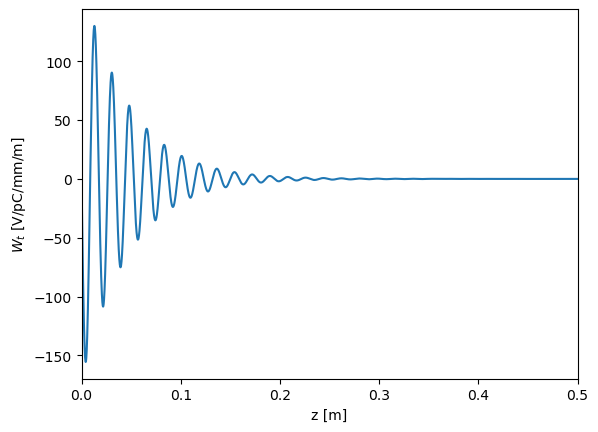

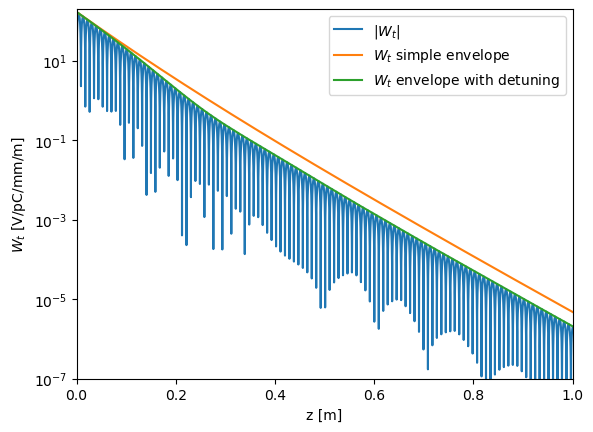

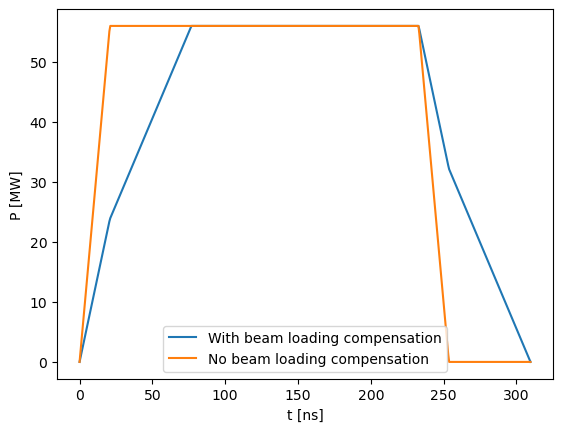

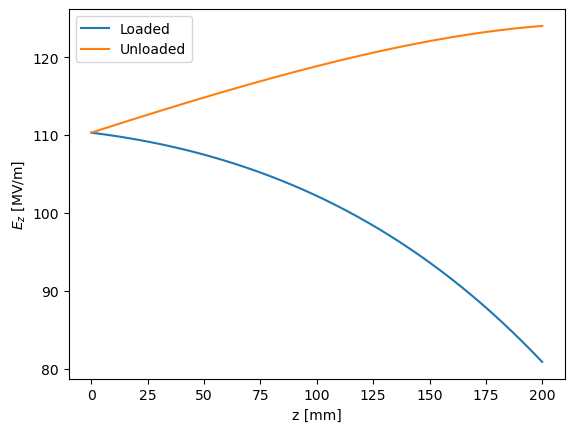

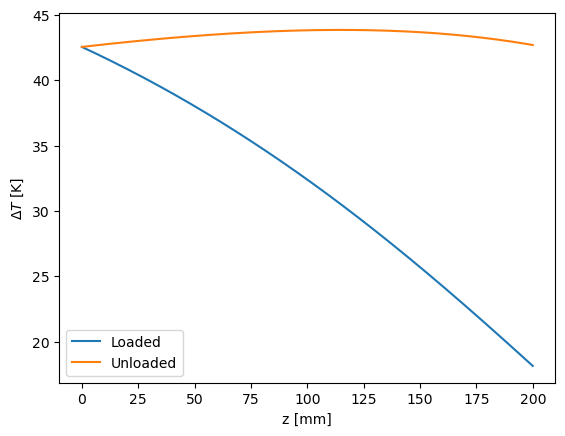

In [48]:
plotWake(acs2, "acs2")
plotPulseShape(acs2, "acs2", I_beam, P0)
plotFieldProfile(acs2, "acs2", P0, I_beam)
plotDeltaTProfile(acs2,"acs2", P0, I_beam)

# Testing paramset2 with CellBase_compat, new DB v1

Creating a paramset2_noPsi structure using CellBase_compat and 12GHz database / version 1

In [49]:
base4 = CLICopti.CellBase.CellBase_compat(CLICopti.CellBase.celldatabase_TD_12GHz_v1, 11.9942, False, 2)
acs2_DB12v1 = CLICopti.RFStructure.AccelStructure_paramSet2_noPsi \
           (base4, Ncells,\
            0.110022947942206, 0.016003337882503*2,
            0.160233420548558, 0.040208386429788*2)


In [50]:
printStuff1(acs2_DB12v1)

Length = 199.958285171166 mm
t_fill = 56.116040235659604 mm
t_rise = 20.586379892922274 mm
FIRST = h=0.0083316[m], a=0.00314999[m], d_n=0.200442, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=5545, vg=1.72279[%c], rQ=14689.2[linacOhm/m], Es=2.04973, Hs=4.20085[mA/V], Sc=0.437929[mA/V], f1mn=16.8313[GHz], Q1mn=9.43731, A1mn=164.681[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=5649, vg=1.2176[%c], rQ=16191.5[linacOhm/m], Es=2.04938, Hs=3.93854[mA/V], Sc=0.38359[mA/V], f1mn=17.1829[GHz], Q1mn=8.11504, A1mn=191.232[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.120025, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=5758.67, vg=0.846676[%c], rQ=17802.8[linacOhm/m], Es=2.03611, Hs=3.61168[mA/V], Sc=0.330457[mA/V], f1mn=17.4664[GHz], Q1mn=7.0713, A1mn=218.693[V/pC/m/mm]
Pin at 100 MV/m (unloaded) =  41.547022640826576 MW
Peak fields (unloaded) :
	 maxEs=209.436[MV/m]@idx=394, maxHs=399.833[kA/m]@idx=140, maxSc=3.94706[

In [51]:
P0 = printStuff2(acs2_DB12v1, I_beam)

Pin at 100 MV/m (loaded) =  57.85371331076416 MW
Peak fields (unloaded) :
	 maxEs=228.25[MV/m]@idx=0, maxHs=467.791[kA/m]@idx=0, maxSc=5.4304[W/um^2]@idx=0, maxPC=2.92309[MW/mm]@idx=0
Max beam time (loaded):
	 power=57.8537[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=1.19202[A], powerFraction=0.85, wastedTime=21.9022[ns], maxFields={maxEs=228.25[MV/m]@idx=0, maxHs=467.791[kA/m]@idx=0, maxSc=5.4304[W/um^2]@idx=0, maxPC=2.92309[MW/mm]@idx=0}, time_E=138.461[ns], time_Sc=58.0286[ns], time_dT=226.776[ns], time_PC=75.5267[ns], time=58.0286[ns], which='S'
Max beam time (loaded pulse, no beam):
	 power=57.8537[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=0[A], powerFraction=0.85, wastedTime=21.9022[ns], maxFields={maxEs=247.142[MV/m]@idx=394, maxHs=471.818[kA/m]@idx=140, maxSc=5.49624[W/um^2]@idx=135, maxPC=2.92309[MW/mm]@idx=0}, time_E=77.6112[ns], time_Sc=55.1905[ns], time_dT=217.689[ns], time_PC=75.5267[ns], time=55.1905[ns], which='S'
Max beam time (loaded p

Plotting the wakefield...


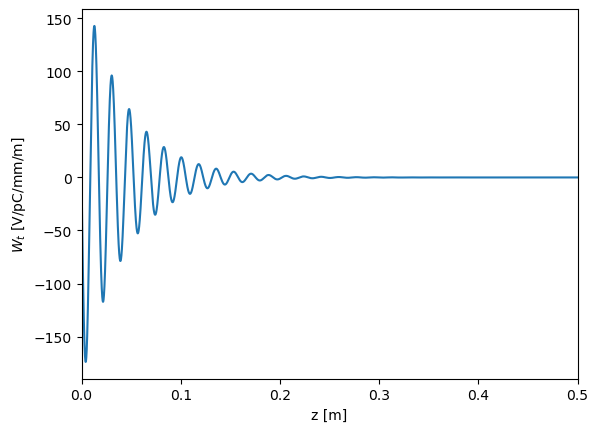

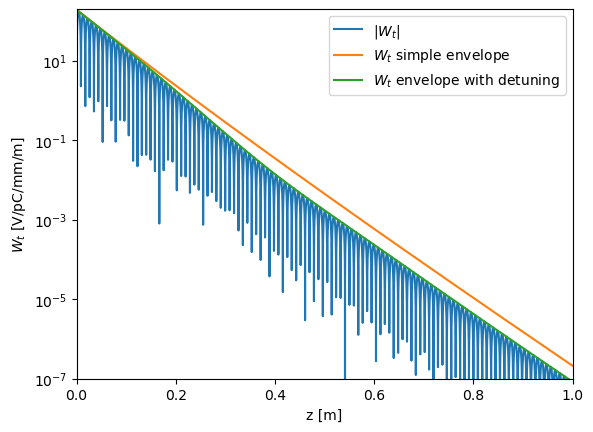

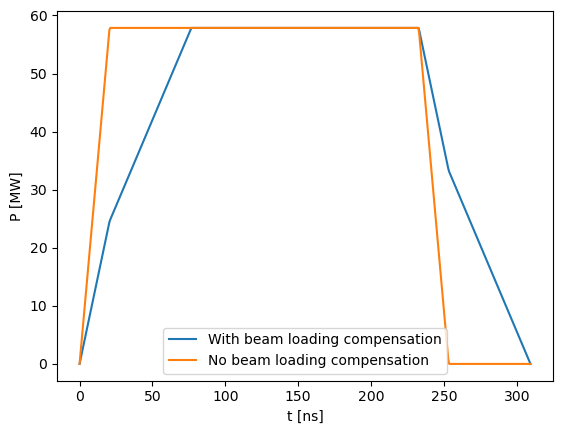

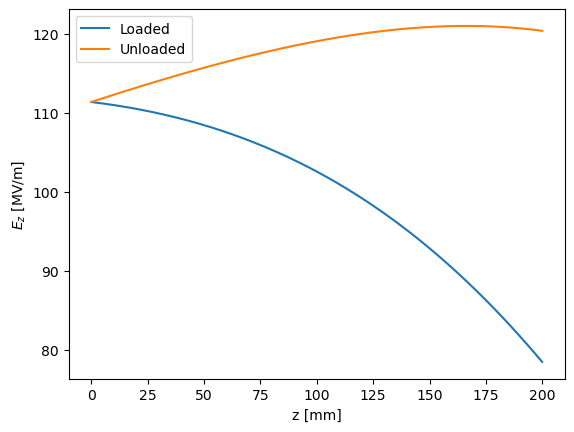

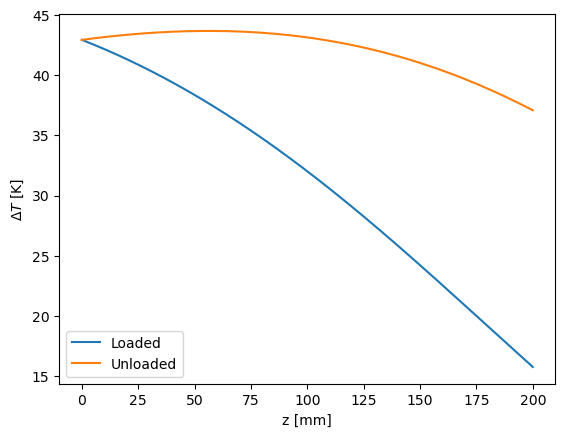

In [52]:
plotWake(acs2_DB12v1, "acs2_DB12v1")
plotPulseShape(acs2_DB12v1, "acs2_DB12v1", I_beam, P0)
plotFieldProfile(acs2_DB12v1, "acs2_DB12v1", P0, I_beam)
plotDeltaTProfile(acs2_DB12v1,"acs2_DB12v1", P0, I_beam)

# Testing paramset2 with CellBase_compat, new DB v2

Creating a paramset2_noPsi structure using CellBase_compat and 12GHz database / version 2

In [53]:
base5 = CLICopti.CellBase.CellBase_compat(CLICopti.CellBase.celldatabase_TD_12GHz_v2, 11.9942, False, 2)
acs2_DB12v2 = CLICopti.RFStructure.AccelStructure_paramSet2_noPsi \
           (base5, Ncells,\
            0.110022947942206, 0.016003337882503*2,
            0.160233420548558, 0.040208386429788*2)


In [54]:
printStuff1(acs2_DB12v2)

Length = 199.958285171166 mm
t_fill = 56.12765311368474 mm
t_rise = 20.515780832722882 mm
FIRST = h=0.0083316[m], a=0.00315[m], d_n=0.200442, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=5551.04, vg=1.7058[%c], rQ=14600.1[linacOhm/m], Es=1.99943, Hs=4.2072[mA/V], Sc=0.426681[mA/V], f1mn=16.804[GHz], Q1mn=9.61088, A1mn=161.859[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=5649, vg=1.21758[%c], rQ=16191.4[linacOhm/m], Es=2.04935, Hs=3.93854[mA/V], Sc=0.383582[mA/V], f1mn=17.1829[GHz], Q1mn=8.11516, A1mn=191.23[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.120025, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=5758.13, vg=0.84959[%c], rQ=17813[linacOhm/m], Es=2.0412, Hs=3.61078[mA/V], Sc=0.331708[mA/V], f1mn=17.4682[GHz], Q1mn=7.05253, A1mn=219.011[V/pC/m/mm]
Pin at 100 MV/m (unloaded) =  41.579148652665396 MW
Peak fields (unloaded) :
	 maxEs=210.03[MV/m]@idx=394, maxHs=400.483[kA/m]@idx=122, maxSc=3.92373[W/um^2]

In [55]:
P0 = printStuff2(acs2_DB12v2, I_beam)

Pin at 100 MV/m (loaded) =  57.89564255691098 MW
Peak fields (unloaded) :
	 maxEs=223.198[MV/m]@idx=14, maxHs=469.565[kA/m]@idx=0, maxSc=5.31506[W/um^2]@idx=0, maxPC=2.9252[MW/mm]@idx=0
Max beam time (loaded):
	 power=57.8956[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=1.19202[A], powerFraction=0.85, wastedTime=21.881[ns], maxFields={maxEs=223.198[MV/m]@idx=14, maxHs=469.565[kA/m]@idx=0, maxSc=5.31506[W/um^2]@idx=0, maxPC=2.9252[MW/mm]@idx=0}, time_E=161.527[ns], time_Sc=63.3672[ns], time_dT=222.733[ns], time_PC=75.3372[ns], time=63.3672[ns], which='S'
Max beam time (loaded pulse, no beam):
	 power=57.8956[MW], beamCurrent_pulseShape=1.19202[A], beamCurrent_loading=0[A], powerFraction=0.85, wastedTime=21.881[ns], maxFields={maxEs=247.837[MV/m]@idx=394, maxHs=472.573[kA/m]@idx=122, maxSc=5.46347[W/um^2]@idx=177, maxPC=2.9252[MW/mm]@idx=0}, time_E=75.9706[ns], time_Sc=56.6071[ns], time_dT=216.021[ns], time_PC=75.3372[ns], time=56.6071[ns], which='S'
Max beam time (loaded 

Plotting the wakefield...


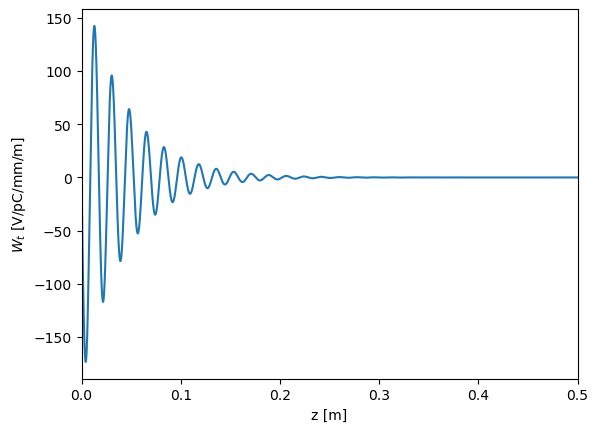

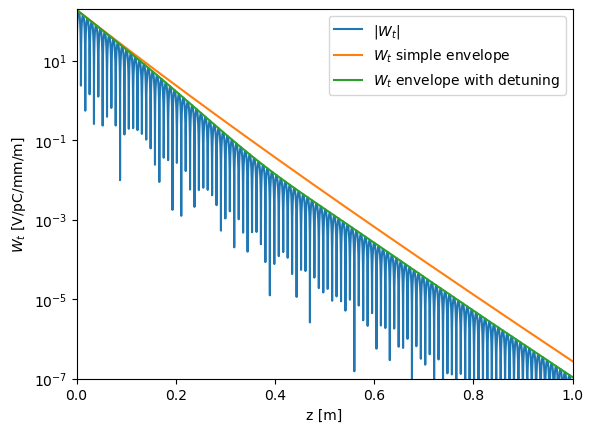

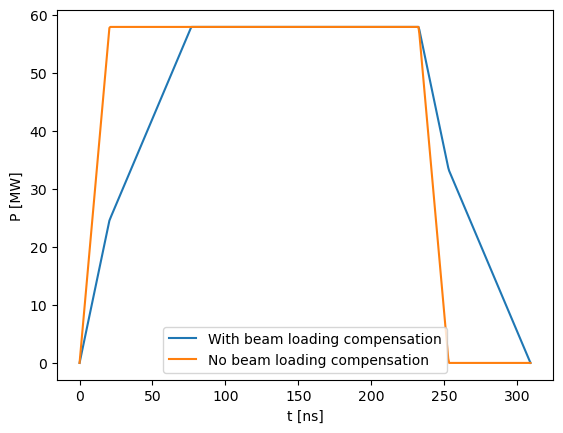

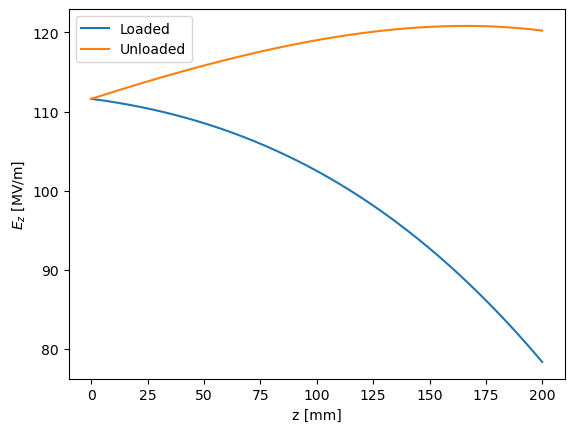

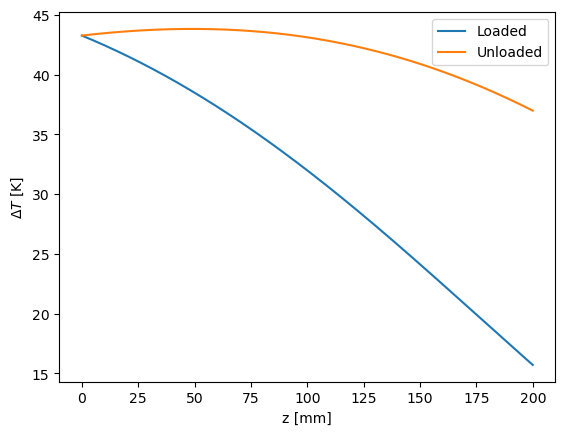

In [56]:
plotWake(acs2_DB12v2, "acs2_DB12v2")
plotPulseShape(acs2_DB12v2, "acs2_DB12v2", I_beam, P0)
plotFieldProfile(acs2_DB12v2, "acs2_DB12v2", P0, I_beam)
plotDeltaTProfile(acs2_DB12v2,"acs2_DB12v2", P0, I_beam)

# Extra tests for Daniel

Length = 199.958285171166 mm
t_fill = 61.09605694846149 mm
t_rise = 31.826291004527754 mm
FIRST = h=0.0083316[m], a=0.00315[m], d_n=0.120025, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=6429.44, vg=2.28745[%c], rQ=15280.8[linacOhm/m], Es=2.278, Hs=3.96407[mA/V], Sc=nan[mA/V], f1mn=16.7278[GHz], Q1mn=10.1012, A1mn=152.163[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=6275.1, vg=1.22728[%c], rQ=16296.7[linacOhm/m], Es=2.03163, Hs=3.97689[mA/V], Sc=nan[mA/V], f1mn=17.1459[GHz], Q1mn=8.92068, A1mn=170.983[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.200442, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=6107.24, vg=0.54766[%c], rQ=17134.4[linacOhm/m], Es=1.86544, Hs=4.01769[mA/V], Sc=nan[mA/V], f1mn=17.4879[GHz], Q1mn=7.99063, A1mn=185.341[V/pC/m/mm]
Pin at 100 MV/m (unloaded) =  37.930357287509814 MW
Peak fields (unloaded) :
	 maxEs=222.702[MV/m]@idx=499, maxHs=479.644[kA/m]@idx=499, maxSc=0[W/um^2]@idx=0, maxPC

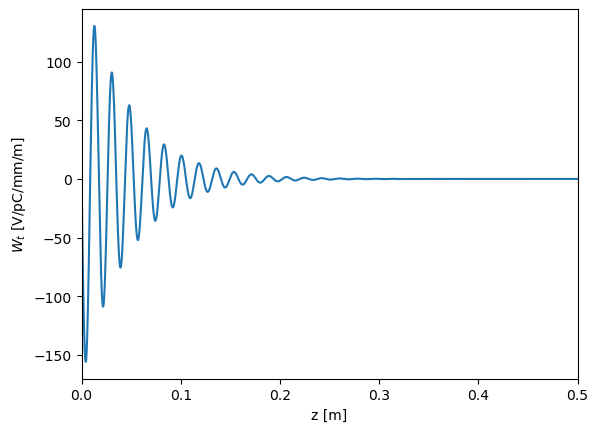

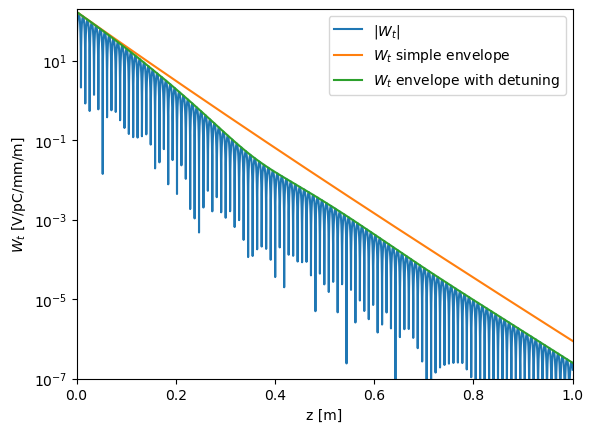

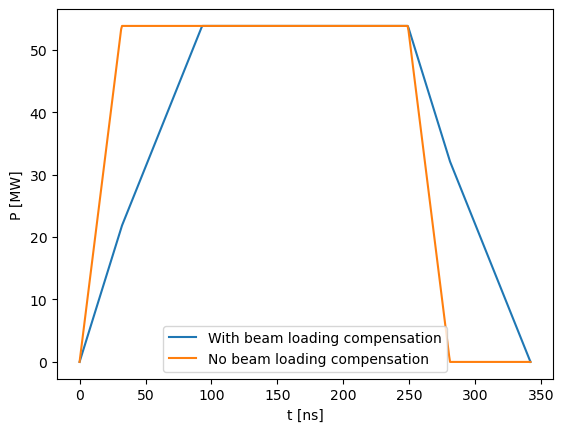

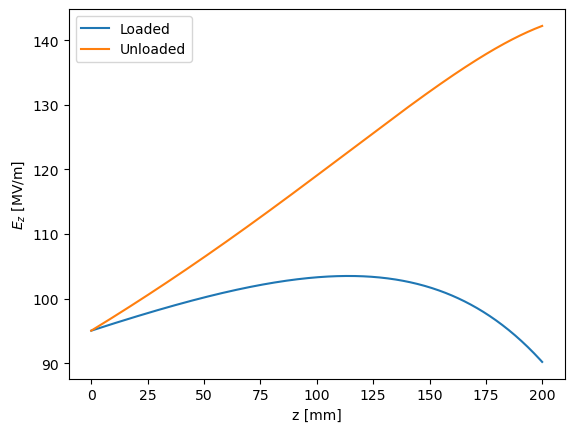

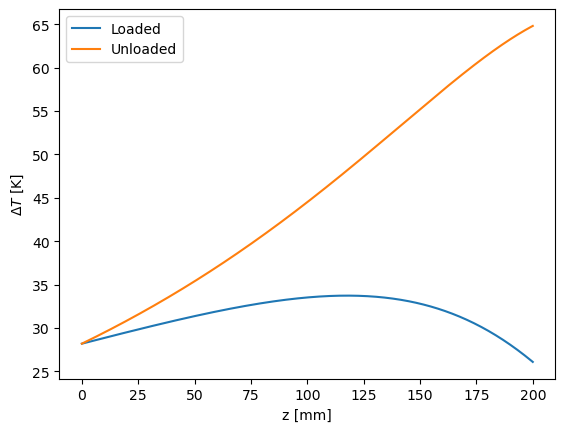

In [57]:
## Inverted iris thickness, cellBase_compat:
acs2_invIrisThick=CLICopti.RFStructure.AccelStructure_paramSet2(base3,Ncells,120.0,\
                                                                0.110022947942206, 0.016003337882503*2,
                                                                0.160233420548558, -0.040208386429788*2)
printStuff1(acs2_invIrisThick)
P0 = printStuff2(acs2_invIrisThick, I_beam)
plotWake(acs2_invIrisThick, "acs2_invIrisThick")
plotPulseShape(acs2_invIrisThick, "acs2_invIrisThick", I_beam, P0)
plotFieldProfile(acs2_invIrisThick, "acs2_invIrisThick", P0, I_beam)
plotDeltaTProfile(acs2_invIrisThick,"acs2_invIrisThick", P0, I_beam)

Length = 199.958285171166 mm
t_fill = 58.11877822634904 mm
t_rise = 25.683521955886132 mm
FIRST = h=0.0083316[m], a=0.00315[m], d_n=0.160233, a_n=0.126026, f0=11.9942[GHz], psi=120[deg], Q=6308.74, vg=1.97214[%c], rQ=15023.9[linacOhm/m], Es=2.13866, Hs=4.08638[mA/V], Sc=nan[mA/V], f1mn=16.709[GHz], Q1mn=10.7992, A1mn=151.992[V/pC/m/mm]
MID   = h=0.0083316[m], a=0.00275[m], d_n=0.160233, a_n=0.110023, f0=11.9942[GHz], psi=120[deg], Q=6275.1, vg=1.22728[%c], rQ=16296.7[linacOhm/m], Es=2.03163, Hs=3.97689[mA/V], Sc=nan[mA/V], f1mn=17.1459[GHz], Q1mn=8.92068, A1mn=170.983[V/pC/m/mm]
LAST  = h=0.0083316[m], a=0.00235[m], d_n=0.160233, a_n=0.0940196, f0=11.9942[GHz], psi=120[deg], Q=6244.4, vg=0.678645[%c], rQ=17567.2[linacOhm/m], Es=1.91817, Hs=3.88149[mA/V], Sc=nan[mA/V], f1mn=17.5427[GHz], Q1mn=7.7062, A1mn=185.401[V/pC/m/mm]
Pin at 100 MV/m (unloaded) =  38.94814478898838 MW
Peak fields (unloaded) :
	 maxEs=215.345[MV/m]@idx=499, maxHs=435.758[kA/m]@idx=499, maxSc=0[W/um^2]@idx=0, maxPC=

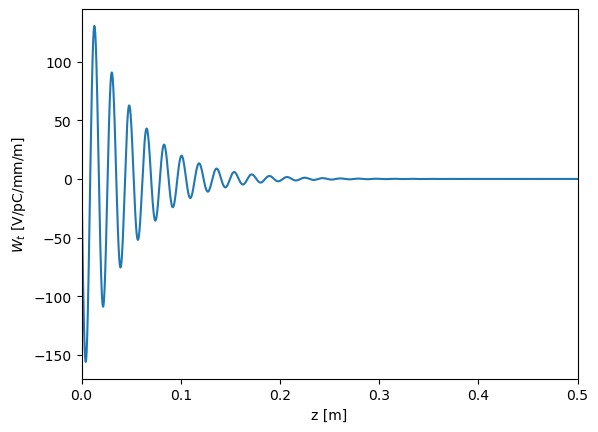

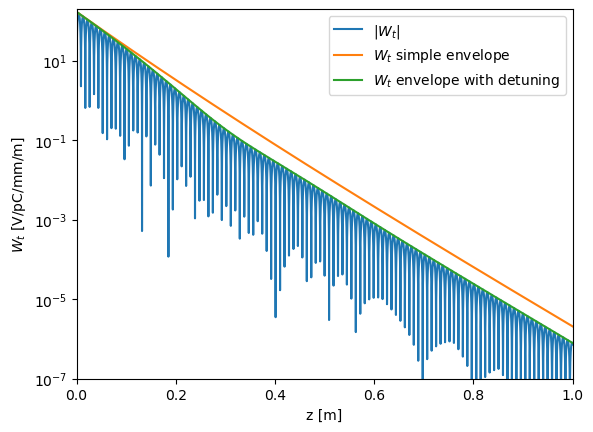

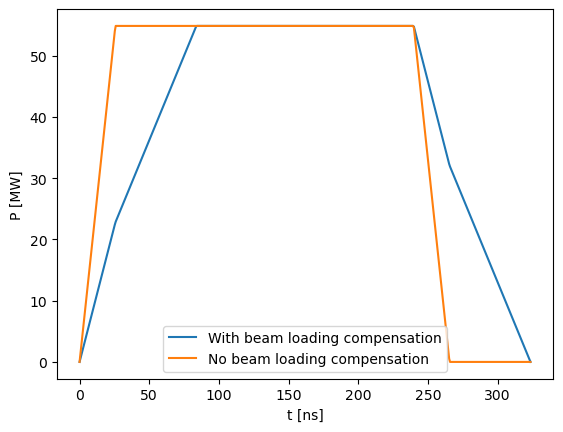

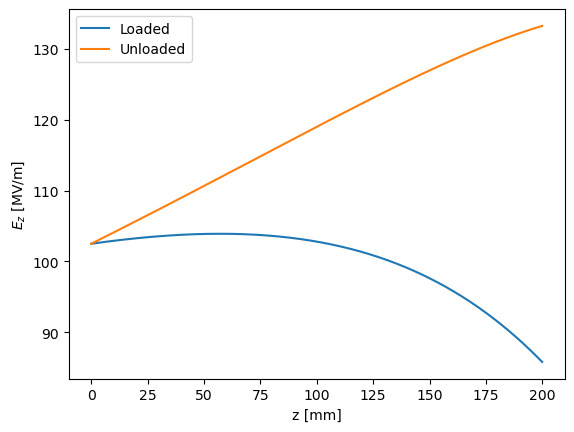

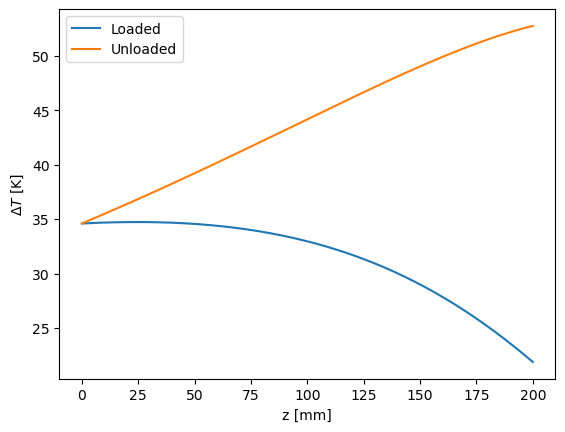

In [58]:
## No iris thickness tapering, cellBase_compat:
acs2_noIrisThickTaper=CLICopti.RFStructure.AccelStructure_paramSet2(base3,Ncells,120.0,\
                                                                0.110022947942206, 0.016003337882503*2,
                                                                0.160233420548558, 0.0)
printStuff1(acs2_noIrisThickTaper)
P0 = printStuff2(acs2_noIrisThickTaper, I_beam)
plotWake(acs2_noIrisThickTaper, "acs2_noIrisThickTaper")
plotPulseShape(acs2_noIrisThickTaper, "acs2_noIrisThickTaper", I_beam, P0)
plotFieldProfile(acs2_noIrisThickTaper, "acs2_noIrisThickTaper", P0, I_beam)
plotDeltaTProfile(acs2_noIrisThickTaper,"acs2_noIrisThickTaper", P0, I_beam)